In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['y_label'] = dataset.target


In [3]:
dict_ = {k:v for k,v in enumerate(dataset.target_names)}

In [4]:
df['iris_category'] = df['y_label'].map(dict_)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_label,iris_category
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
y_label              150 non-null int64
iris_category        150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/anaconda3/envs/base_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/base_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

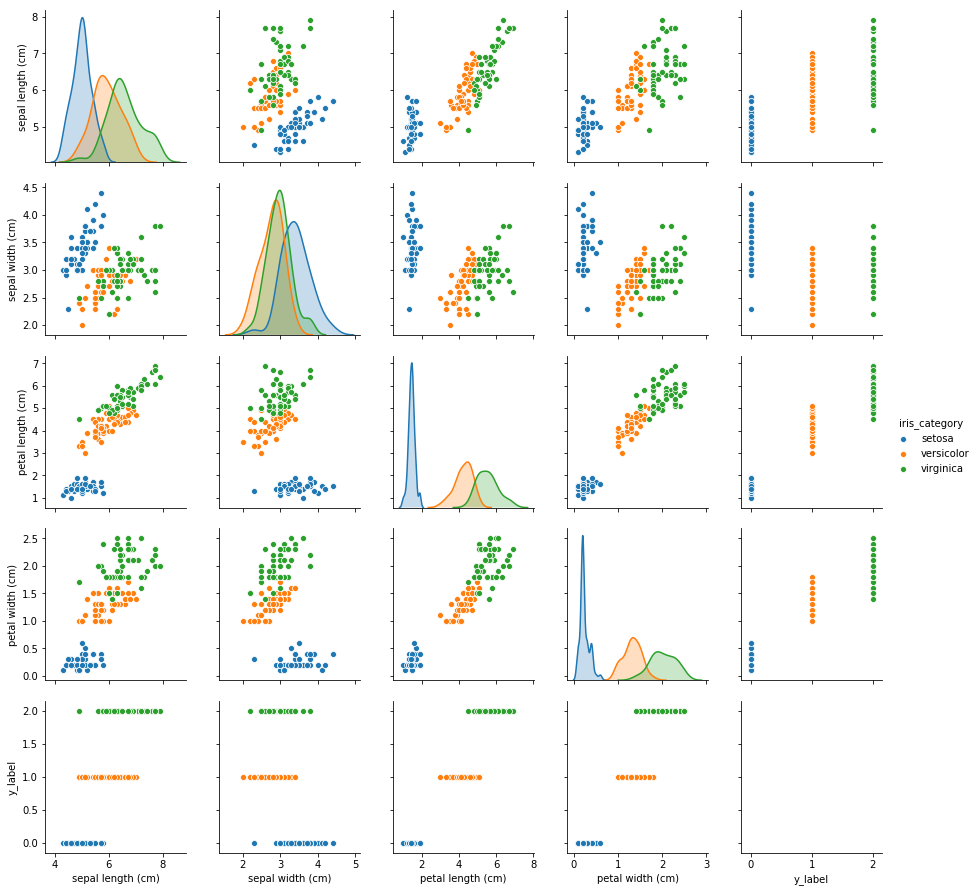

In [7]:
sns.pairplot(df, hue='iris_category')

# KMean

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'y_label', 'iris_category'],
      dtype='object')

In [10]:
X = df.iloc[:,2:4].values
y = df.y_label
km.fit(X)
labels = km.predict(X)
centroids = km.cluster_centers_

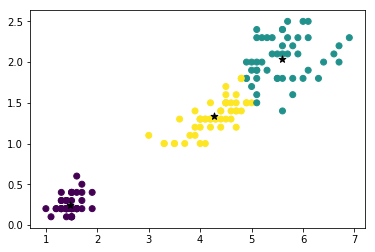

In [11]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='k', s=50)
plt.show()

In [12]:
labels = pd.DataFrame(labels).replace({2:0,0:1,1:2})

In [13]:
labels = labels.values.ravel()

In [14]:
pd.crosstab(y,labels, colnames=['Predicted'])

Predicted,0,1,2
y_label,,,
0,0,50,0
1,48,0,2
2,4,0,46


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.30666666666666664

# GMM

In [16]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)

In [17]:
gmm.fit(X)
labels1=gmm.predict(X)

In [18]:
labels1 = pd.DataFrame(labels1).replace({1:0, 0:1}).values

In [19]:
labels1 = labels1.ravel()   # convert 2d ndarray to 1d ndarray

In [20]:
pd.crosstab(y, labels1)   # only accept 1d array

col_0,0,1,2
y_label,,,
0,50,0,0
1,0,49,1
2,0,3,47


In [21]:
accuracy_score(y, labels1)

0.9733333333333334

# Linear regression

In [22]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:3]   # X needs to be a dataframe
y = df.iloc[:,3]     # y needs to be a series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
y_train.shape

(105,)

In [24]:
from sklearn.linear_model import LinearRegression
lin_rg = LinearRegression()
lin_rg.fit(X_train, y_train)
y_pred = lin_rg.predict(X_test)

In [25]:
lin_rg.intercept_

-0.3660242123705344

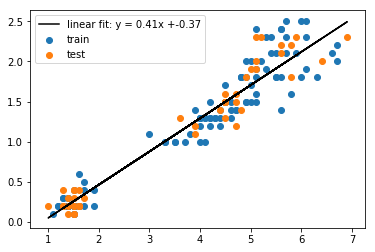

In [26]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_pred, c='k', label = 'linear fit: y = {:.2f}x +{:.2f}'.format(lin_rg.coef_[0], lin_rg.intercept_))
plt.legend(loc='best')
plt.show()

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9445431815567876

# Preprocessing for ML classification models

In [28]:
X = df.drop(["y_label", "iris_category"],1)
y = df['y_label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegressionCV as LCV, LogisticRegression as logR

In [32]:
lcv, log_r = LCV(), logR()

In [33]:
lcv.fit(X_train, y_train)
y_pred = lcv.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [35]:
log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)
accuracy_score(y_test, y_pred)

0.9111111111111111

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

1.0

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

# SVM

In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

1.0

In [41]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

1.0

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

1.0

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gb = GaussianNB()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9777777777777777

# tf.estimator

In [59]:
import tensorflow as tf

In [62]:
X.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']

In [63]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [64]:
feat_cols = [tf.feature_column.numeric_column(key) for key in X.columns]

In [65]:
for col in X.columns:
    X[col] = (X[col]-X[col].mean())/X[col].std()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
model = tf.estimator.LinearClassifier(feat_cols,n_classes=3, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpitpdw6eu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a32ee7860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=32, num_epochs=1000, shuffle=True)

In [69]:
model.train(input_func,steps=4000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpitpdw6eu/model.ckpt.
INFO:tensorflow:loss = 35.155594, step = 1
INFO:tensorflow:global_step/sec: 412.809
INFO:tensorflow:loss = 3.6772738, step = 101 (0.243 sec)
INFO:tensorflow:global_step/sec: 580.937
INFO:tensorflow:loss = 0.8122811, step = 201 (0.172 sec)
INFO:tensorflow:global_step/sec: 557.052
INFO:tensorflow:loss = 1.5284894, step = 301 (0.179 sec)
INFO:tensorflow:global_step/sec: 567.975
INFO:tensorflow:loss = 0.7593404, step = 401 (0.177 sec)
INFO:tensorflow:global_step/sec: 582.182
INFO:tensorflow:loss = 1.4107342, step = 501 (0.171 sec)
INFO:tensorflow:global_step/sec: 592.431
INFO:tensorflow:loss = 2.3026428, step = 601 (0.170 sec)
INFO:tensorfl

In [ ]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, num_epochs=1, shuffle=False, batch_size=32)

In [ ]:
model.evaluate(eval_func)